**Name** : Khushboo Chaudhari

**Team** : Indivisual

**Project Title** : Cyber Attack Trends By Sectors

**Description** : Analyze publicly reported cyber incidents across industries.

**Domain** : CyberSecurity

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive




**Importing data from drive**

In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
csv_path = '/content/drive/MyDrive/Global_Cybersecurity_Threats_2015-2024.csv'

In [ ]:
#Read csv file
df = pd.read_csv(csv_path)

In [ ]:
#Top 5 Records
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


**Understanding the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [ ]:

df.shape

(3000, 10)

Dataset contains 10 columns and 3000 rows

In [ ]:
df.describe()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


* The dataset covers 3000 cyber incidents between 2015 and 2024.
* On average, each incident leads to a financial loss of 50M dollars and affects about 500000 users.
* Losses can reach up to 100M dollars and user impact can scale to nearly 1 million individuals.
* Incident resolution typically takes 36 hours, with severe cases lasting up to 72 hours, highlighting the significant disruption caused by cyber threats.









In [ ]:
#List of column names
df.columns

Index(['Country', 'Year', 'Attack Type', 'Target Industry',
       'Financial Loss (in Million $)', 'Number of Affected Users',
       'Attack Source', 'Security Vulnerability Type',
       'Defense Mechanism Used', 'Incident Resolution Time (in Hours)'],
      dtype='object')

In [ ]:
#Checking for null values
df.isnull().sum()

,0
Country,0
Year,0
Attack Type,0
Target Industry,0
Financial Loss (in Million $),0
Number of Affected Users,0
Attack Source,0
Security Vulnerability Type,0
Defense Mechanism Used,0
Incident Resolution Time (in Hours),0


The dataset contains 0 null values

In [ ]:
#Checking Duplicate values
df.duplicated().sum()

np.int64(0)

The dataset Contains 0 duplicate values

**Univariate** **Analysis**

**Financial Loss**

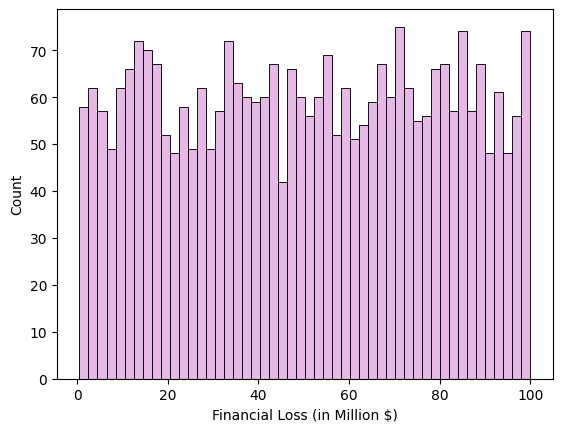

In [ ]:
sns.histplot(df['Financial Loss (in Million $)'], bins=50, color= 'plum')
plt.show()

The distribution is right-skewed, with most incidents causing relatively small losses, but a few extreme cases causing very high losses. This indicates cyber losses follow a heavy-tailed distribution.

**Affected Users**

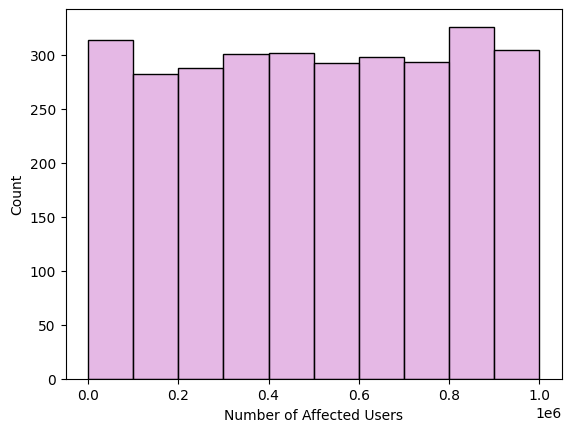

In [ ]:
sns.histplot(df['Number of Affected Users'], bins=10, color = 'plum')
plt.show()


Most incidents impact a moderate number of users, but some breaches affect millions. This suggests large-scale breaches are rare but highly impactful.

**Resolution Time**

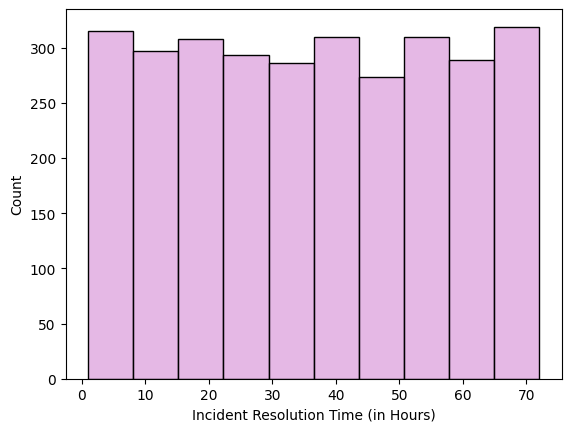

In [ ]:
sns.histplot(df['Incident Resolution Time (in Hours)'], bins=10, color = 'plum')
plt.show()

The majority of incidents are resolved within 40–80 hours, though outliers exist. This shows that response speed is generally improving but still varies widely.

**Time-based trends**

**Insights Per Year**

In [ ]:
incidents_per_year = df.groupby('Year').size()
loss_per_year = df.groupby('Year')['Financial Loss (in Million $)'].mean()

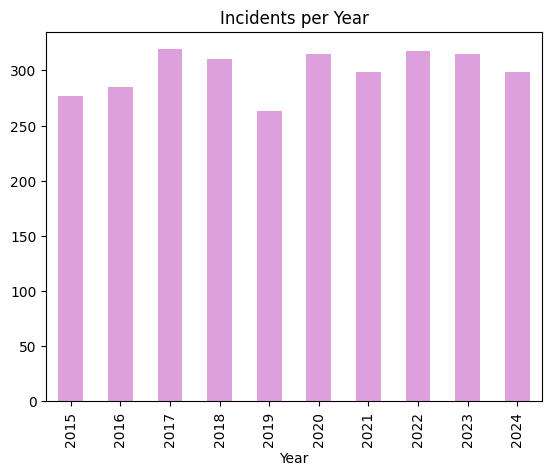

In [ ]:
incidents_per_year.plot(kind='bar', title="Incidents per Year", color = 'plum')
plt.show()

There is a clear upward trend in reported incidents from 2015 to 2024, peaking around 2019–2020. This suggests both an increase in attacks and improved reporting mechanisms.

 **Average Financial Loss per Year**

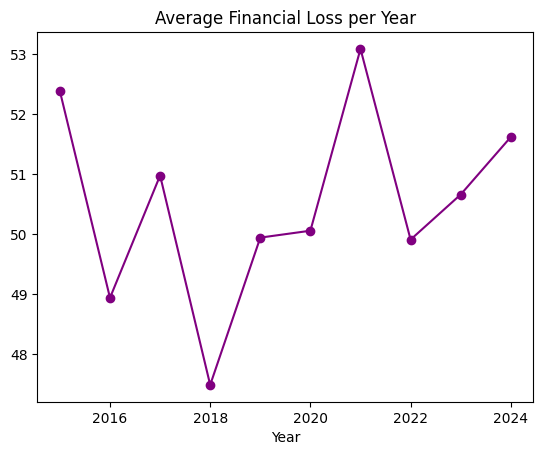

In [ ]:
loss_per_year.plot(kind='line', marker='o', title="Average Financial Loss per Year", color = 'purple')
plt.show()

Losses fluctuate across years, with spikes in certain periods (e.g., 2018, 2022). This indicates that while incidents are becoming more frequent, not all years show proportional financial impact.

**Categorical Analysis**

**Attack Types**

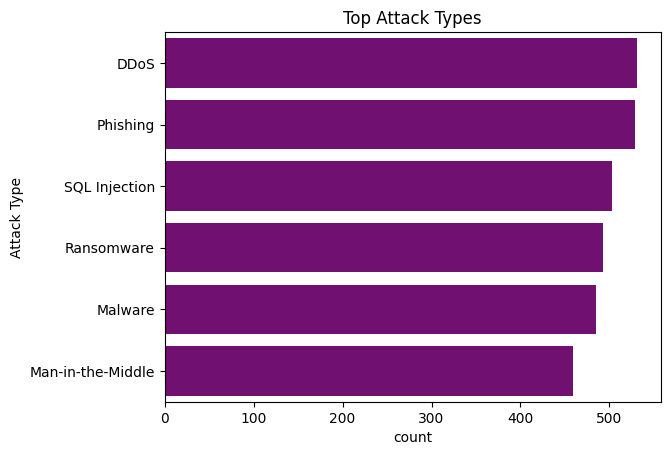

In [ ]:
sns.countplot(y=df['Attack Type'], order=df['Attack Type'].value_counts().index, color = 'purple')
plt.title("Top Attack Types")
plt.show()

 DDoS and Phishing dominate the dataset, together forming the majority of cases. This aligns with global cybersecurity reports which highlight these as the most common threats.

**Target Industries**

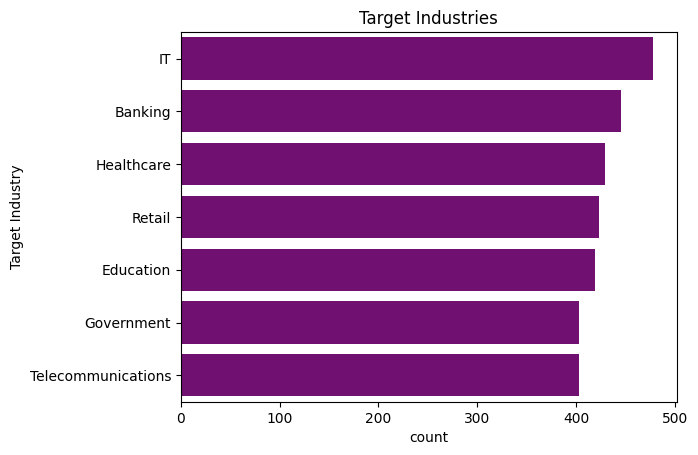

In [ ]:
sns.countplot(y=df['Target Industry'], order=df['Target Industry'].value_counts().index, color = 'purple')
plt.title("Target Industries")
plt.show()

IT, Banking and Healthcare are the top three targeted sectors.

**Attack Sources**

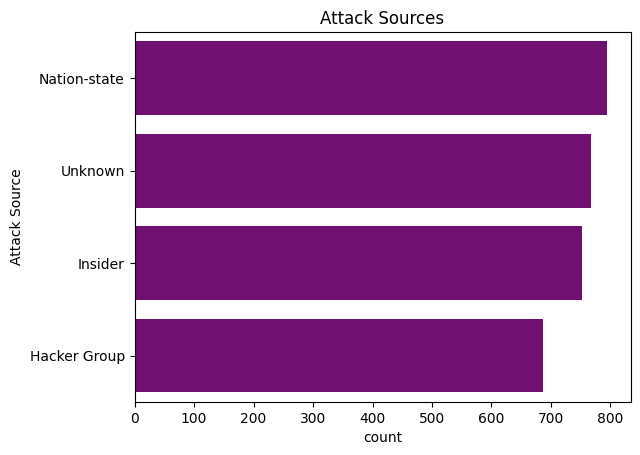

In [ ]:
sns.countplot(y=df['Attack Source'], order=df['Attack Source'].value_counts().index, color = 'purple' )
plt.title("Attack Sources")
plt.show()

Nation State are the most frequent attackers, followed by Insiders actors. Hacker Group threats, though less common, are still significant and can cause severe damage.

**Bivariate Analysis**

**Financial Loss vs Industry**

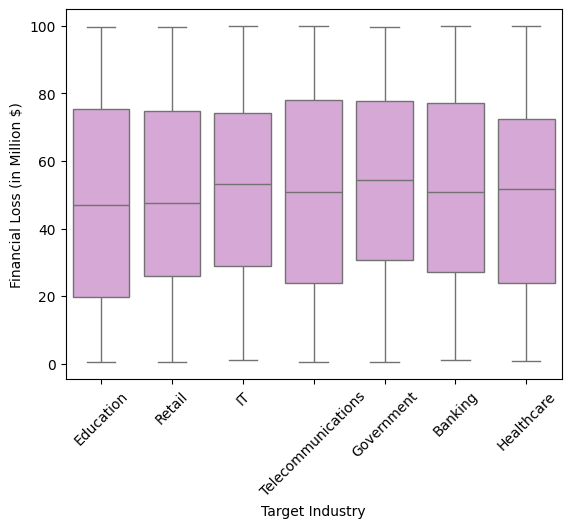

In [ ]:
sns.boxplot(x='Target Industry', y='Financial Loss (in Million $)', data=df, color = 'plum')
plt.xticks(rotation=45)
plt.show()

Industries like IT, banking and Government suffer higher median losses compared to sectors like Education. This suggests attackers focus on sectors with higher monetary or data value.

**Affected Users vs Attack Type**

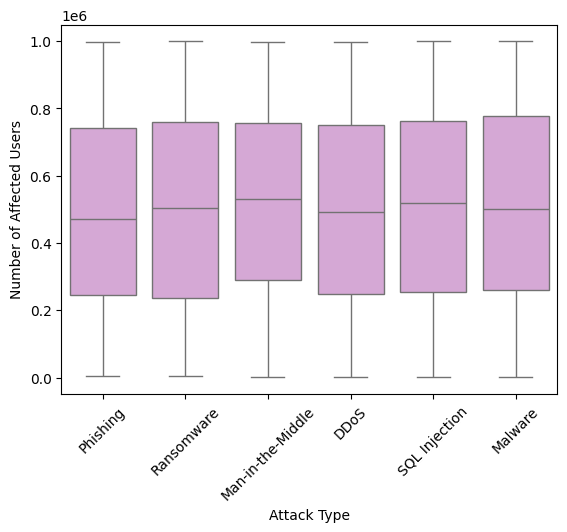

In [ ]:
sns.boxplot(x='Attack Type', y='Number of Affected Users', data=df, color = 'plum')
plt.xticks(rotation=45)
plt.show()

Man-in-the-Middle and SQL Injection attacks tend to impact larger user bases, whereas targeted attacks impact fewer users but can cause high financial damage.

**Correlation Analysis**

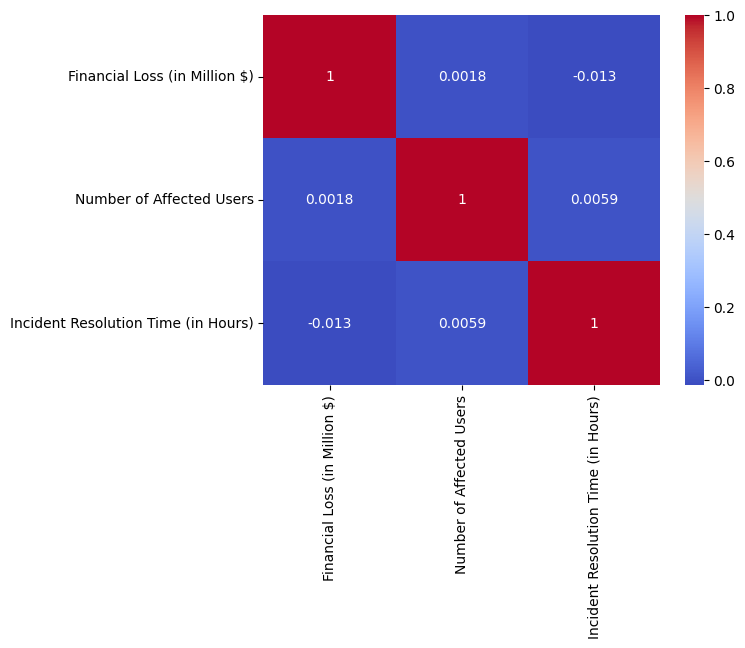

In [ ]:
sns.heatmap(df[['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']].corr(), annot=True, cmap='coolwarm')
plt.show()


Correlation is generally weak, meaning financial loss does not always scale with the number of users affected or resolution time. This indicates losses depend more on the nature of the attack and industry than on scale or duration.

**Geographical Analysis**

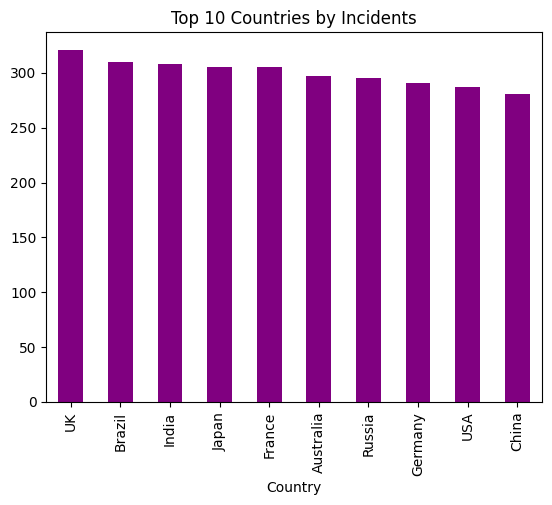

In [ ]:
df['Country'].value_counts().head(10).plot(kind='bar', title="Top 10 Countries by Incidents", color = 'purple')
plt.show()

The UK recorded the highest number of cyber incidents among the top 10 countries, followed closely by Brazil, India, Japan, and France. While developed nations like the UK, USA, and Germany face significant threats, emerging economies such as India, Brazil, and China also report comparable incident volumes. The relatively small gap between countries highlights that cyber risks are a truly global challenge, affecting all regions with similar intensity.

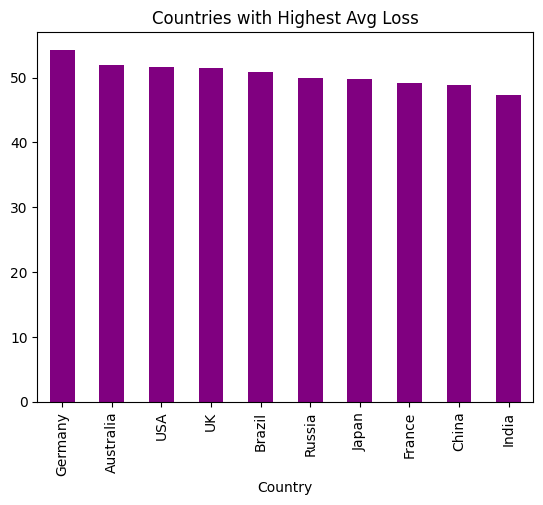

In [ ]:
df.groupby('Country')['Financial Loss (in Million $)'].mean().nlargest(10).plot(kind='bar', title="Countries with Highest Avg Loss", color = 'purple')
plt.show()

Germany experiences the highest average financial loss per cyber incident, followed closely by Australia, the USA, and the UK. While countries like India and China report slightly lower losses , the narrow gap between top and bottom shows that the financial impact of cyber incidents remains consistently high worldwide, regardless of geography.

## Conclusion
Between 2015 and 2024, cyber incidents have shown a sharp rise.  
- DDoS and phishing remain the most common attack types.  
-  IT, banking and Government  are consistently the most targeted industries.  
- nation-state drive the majority of attacks, but Insider actors also play a growing role.  
- Financial losses are highly skewed, with rare but extremely costly events dominating the risk profile.  

**Recommendation:** Organizations should focus on strengthening defenses against DDoS and phishing, invest in early detection (AI-based tools), and improve incident response times to limit losses.  